<a href="https://colab.research.google.com/github/mflechl/colab-genai-simple/blob/main/stable-diffusion-2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import torch
from diffusers import StableDiffusionPipeline

# pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
# pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base", torch_dtype=torch.float16)
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [28]:
# move pipeline to GPU
pipe = pipe.to("cuda")

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 2>:2                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/diffusers/pipeline_utils.py:270 in to                    │
│                                                                                                  │
│   267 │   │   │   │   │   │   " support for`float16` operations on this device in PyTorch. Ple   │
│   268 │   │   │   │   │   │   " `torch_dtype=torch.float16` argument, or use another device fo   │
│   269 │   │   │   │   │   )                                                                      │
│ ❱ 270 │   │   │   │   module.to(torch_device)                                                    │
│   271 │   │   return self                                                                        │
│   272 │                                                                                          │
│   273 │   @property                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1902 in to                │
│                                                                                                  │
│   1899 │   │   │   │   " model has already been set to the correct devices and casted to the co  │
│   1900 │   │   │   )                                                                             │
│   1901 │   │   else:                                                                             │
│ ❱ 1902 │   │   │   return super().to(*args, **kwargs)                                            │
│   1903 │                                                                                         │
│   1904 │   def half(self, *args):                                                                │
│   1905 │   │   # Checks if the model has been loaded in 8-bit                                    │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1145 in to                    │
│                                                                                                  │
│   1142 │   │   │   │   │   │   │   non_blocking, memory_format=convert_to_format)                │
│   1143 │   │   │   return t.to(device, dtype if t.is_floating_point() or t.is_complex() else No  │
│   1144 │   │                                                                                     │
│ ❱ 1145 │   │   return self._apply(convert)                                                       │
│   1146 │                                                                                         │
│   1147 │   def register_full_backward_pre_hook(                                                  │
│   1148 │   │   self,                                                                             │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:797 in _apply                 │
│                                                                                                  │
│    794 │                                                                                         │
│    795 │   def _apply(self, fn):                                                                 │
│    796 │   │   for module in self.children():                                                    │
│ ❱  797 │   │   │   module._apply(fn)                                                             │
│    798 │   │                                               

  0%|          | 0/50 [00:00<?, ?it/s]

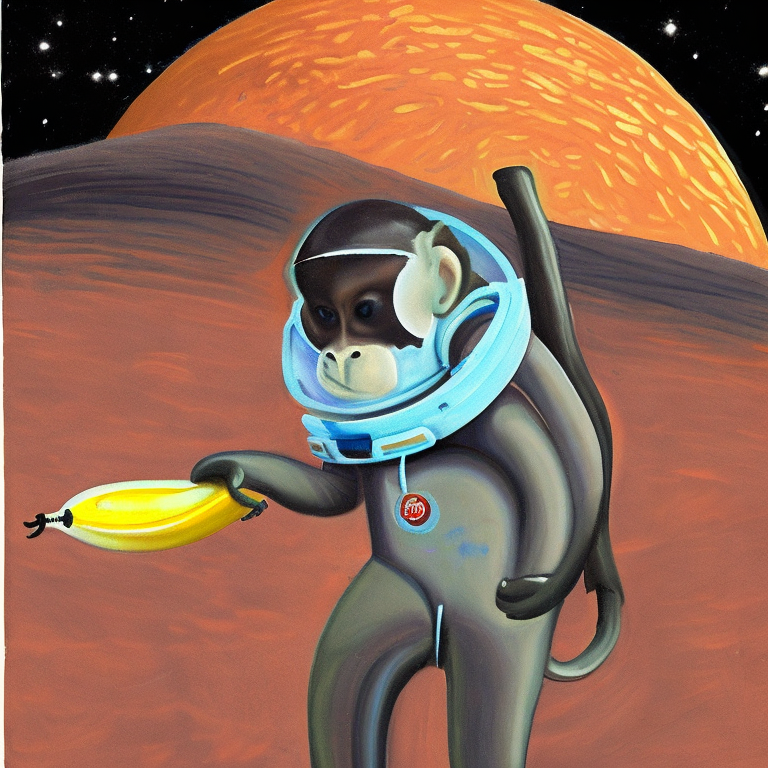

In [14]:
generator = torch.Generator("cuda").manual_seed(42)  # set seed for reproducible results
prompt = "a painting of a monkey on mars in a spacesuit eating a banana in the style of Dalí"
image = pipe(prompt, num_inference_steps=50, generator=generator).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
# image.save(f"astronaut_rides_horse.png")

# In Colab you can directly display it with
image

In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [25]:
torch.cuda.empty_cache()

num_cols = 2
num_rows = 2

generator = torch.Generator("cuda").manual_seed(42)  # set seed for reproducible results
prompt = ["a cubist painting of Vienna"] * num_cols

all_images = []
for i in range(num_rows):
  images = pipe(prompt, num_inference_steps=30, generator=generator).images
  all_images.extend(images)

grid = image_grid(all_images, rows=num_rows, cols=num_cols)
grid

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 8>:9                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:115 in decorate_context       │
│                                                                                                  │
│   112 │   @functools.wraps(func)                                                                 │
│   113 │   def decorate_context(*args, **kwargs):                                                 │
│   114 │   │   with ctx_factory():                                                                │
│ ❱ 115 │   │   │   return func(*args, **kwargs)                                                   │
│   116 │                                                                                          │
│   117 │   return decorate_context                                                                │
│   118                                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_dif │
│ fusion.py:496 in __call__                                                                        │
│                                                                                                  │
│   493 │   │   do_classifier_free_guidance = guidance_scale > 1.0                                 │
│   494 │   │                                                                                      │
│   495 │   │   # 3. Encode input prompt                                                           │
│ ❱ 496 │   │   text_embeddings = self._encode_prompt(                                             │
│   497 │   │   │   prompt, device, num_images_per_prompt, do_classifier_free_guidance, negative   │
│   498 │   │   )                                                                                  │
│   499                                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_dif │
│ fusion.py:266 in _encode_prompt                                                                  │
│                                                                                                  │
│   263 │   │   │   attention_mask = None                                                          │
│   264 │   │                                                                                      │
│   265 │   │   text_embeddings = self.text_encoder(                                               │
│ ❱ 266 │   │   │   text_input_ids.to(device),                                                     │
│   267 │   │   │   attention_mask=attention_mask,                                                 │
│   268 │   │   )                                                                                  │
│   269 │   │   text_embeddings = text_embeddings[0]                                               │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
RuntimeError: CUDA error: invalid argument
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be 
incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.